# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [135]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
from urllib.request import urlopen
import matplotlib.pylab as plt
%pylab inline
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


/Applications/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [184]:
# download data
data1 = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv', encoding='latin1')
data2 = pd.read_csv('https://raw.githubusercontent.com/ninanrh/PUI2017_nn1221/master/HW5_nn1221/data-pvLFI.csv', encoding='latin1')
pop = pd.read_csv('https://raw.githubusercontent.com/ninanrh/PUI2017_nn1221/master/HW5_nn1221/API_SP.POP.TOTL_DS2_en_csv_v2.csv', encoding='latin1')
gdp = pd.read_csv('https://raw.githubusercontent.com/ninanrh/PUI2017_nn1221/master/HW5_nn1221/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', encoding='latin1')

In [185]:
data1 = data1.drop(['ISO code', 'Source', '% of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people'], axis=1)
data1.head(3)

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0


In [186]:
pop = pop[['Country Name','2012']]
pop.head(3)

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0


In [187]:
gdp = gdp[['Country Name','2012']]
gdp.head(3)

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11


In [188]:
# merge data1 and data2
merge1 = pd.merge(data1, data2, left_on='Country/Territory', right_on='Country', how='inner')
merge1.head(3)

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,Australia,15.0,4
1,Austria,18.0,2500000.0,Austria,30.4,1
2,Canada,173.0,9950000.0,Canada,30.8,4


In [189]:
# merge gdp and pop
merge2 = pd.merge(pop, gdp, on='Country Name', how='inner')
merge2.columns = ['Country', 'pop', 'gdp']
merge2.head(3)

,Country,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11


In [190]:
df_ = merge1.merge(merge2, on='Country', how='inner')

In [191]:
df_.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538194e+12
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074516e+11
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824289e+12
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271489e+11
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567065e+11


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [192]:
df_['gdppercapita'] = df_['gdp'] / df_['pop']

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


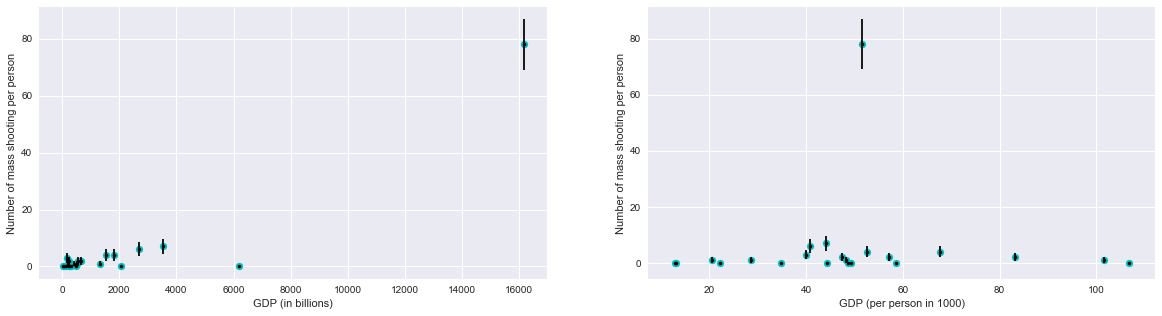

In [193]:
fig = pl.figure(figsize=(20,5)) 

# Mass Shooting vs GDP in Absolute Number
ax = fig.add_subplot(121)
scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'], color='c')
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', color='k')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()

# Mass Shooting vs GDP in Absolute Number
ax2 = fig.add_subplot(122)
ax2.errorbar(df_.gdppercapita / 1e3, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', color='k')
scatter2 = ax2.scatter(df_.gdppercapita / 1e3, df_['Number of mass shootings'], color='c')
ax2.set_xlabel("GDP (per person in 1000)")
ax2.set_ylabel("Number of mass shooting per person")
ax2.set_ylim()

print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

#### Figure 1. Mass Shooting vs GDP (absolute and per capita)

Both pictures show that USA has the highest shooting. USA also has the highest absolute GDP.

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [194]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

In [195]:
df_['civfirecapita'] = df_["Average total all civilian firearms"] / df_['pop'] * 1e3

In [196]:
# Set different dataframe for US
US = df_[(df_['Country'] == 'United States')]

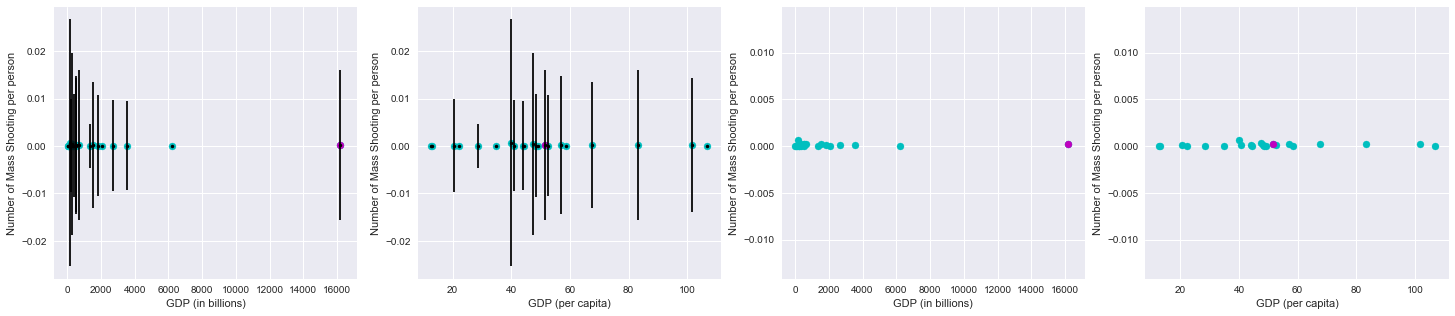

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [197]:
fig = pl.figure(figsize=(25,5)) 

#with error
ax = fig.add_subplot(141)
scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'], color='c')
USscatter = ax.scatter(US.gdp / 1e9, US['shootingspp'], color='m')
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', color='k')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of Mass Shooting per person")
ax.set_ylim()

ax2 = fig.add_subplot(142)
scatter2 = ax2.scatter(df_.gdppercapita / 1e3, df_['shootingspp'], color='c')
USscatter2 = ax2.scatter(US.gdppercapita / 1e3, US['shootingspp'], color='m')
ax2.errorbar(df_.gdppercapita / 1e3, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', color='k')
ax2.set_xlabel("GDP (per capita)")
ax2.set_ylabel("Number of Mass Shooting per person")
ax2.set_ylim()

#without error
ax3 = fig.add_subplot(143)
scatter3 = ax3.scatter(df_.gdp / 1e9, df_['shootingspp'], color='c')
USscatter3 = ax3.scatter(US.gdp / 1e9, US['shootingspp'], color='m')
ax3.set_xlabel("GDP (in billions)")
ax3.set_ylabel("Number of Mass Shooting per person")
ax3.set_ylim()

ax4 = fig.add_subplot(144)
scatter4 = ax4.scatter(df_.gdppercapita / 1e3, df_['shootingspp'], color='c')
USscatter4 = ax4.scatter(US.gdppercapita / 1e3, US['shootingspp'], color='m')
ax4.set_xlabel("GDP (per capita)")
ax4.set_ylabel("Number of Mass Shooting per person")
ax4.set_ylim()

pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

#### Figure 2. Mass Shooting per person vs GDP (absolute and per capita)

Both pictures show that USA has the highest shooting percapita and has the highest absolute GDP.

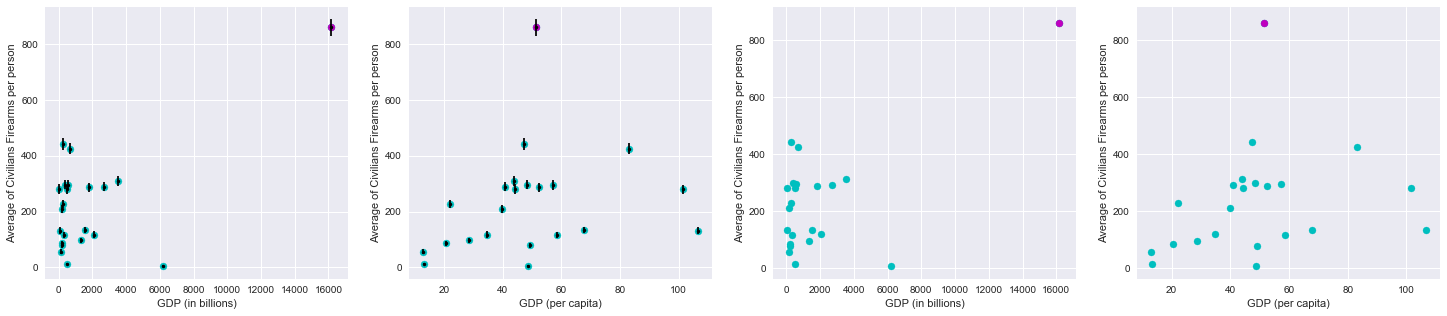

In [198]:
fig = pl.figure(figsize=(25,5)) 

#with error
ax = fig.add_subplot(141)
scatter = ax.scatter(df_.gdp / 1e9, df_['civfirecapita'], color='c')
USscatter = ax.scatter(US.gdp / 1e9, US['civfirecapita'], color='m')
ax.errorbar(df_.gdp / 1e9, df_['civfirecapita'], 
            yerr = np.sqrt(df_['civfirecapita'] * 1.0), fmt = '.', color='k')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average of Civilians Firearms per person")
ax.set_ylim()

ax2 = fig.add_subplot(142)
scatter2 = ax2.scatter(df_.gdppercapita / 1e3, df_['civfirecapita'], color='c')
USscatter2 = ax2.scatter(US.gdppercapita / 1e3, US['civfirecapita'], color='m')
ax2.errorbar(df_.gdppercapita / 1e3, df_['civfirecapita'], 
            yerr = np.sqrt(df_['civfirecapita'] * 1.0), fmt = '.', color='k')
ax2.set_xlabel("GDP (per capita)")
ax2.set_ylabel("Average of Civilians Firearms per person")
ax2.set_ylim()

#without error
ax3 = fig.add_subplot(143)
scatter3 = ax3.scatter(df_.gdp / 1e9, df_['civfirecapita'], color='c')
USscatter3 = ax3.scatter(US.gdp / 1e9, US['civfirecapita'], color='m')
ax3.set_xlabel("GDP (in billions)")
ax3.set_ylabel("Average of Civilians Firearms per person")
ax3.set_ylim()

ax4 = fig.add_subplot(144)
scatter4 = ax4.scatter(df_.gdppercapita / 1e3, df_['civfirecapita'], color='c')
USscatter4 = ax4.scatter(US.gdppercapita / 1e3, US['civfirecapita'], color='m')
ax4.set_xlabel("GDP (per capita)")
ax4.set_ylabel("Average of Civilians Firearms per person")
ax4.set_ylim()

pl.show()

#### Figure 2. Average Civilians Firearms per person vs GDP (absolute and per capita)

All pictures show that USA has the highest civilian firearms percapita.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

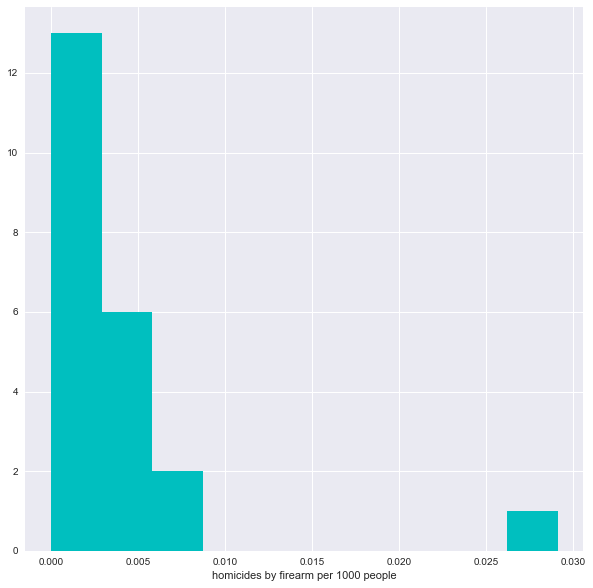

In [199]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000, color='c')
ax.set_xlabel('homicides by firearm per 1000 people');

#### Figure 3. Homicides firearms

There is one outlier indeed.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


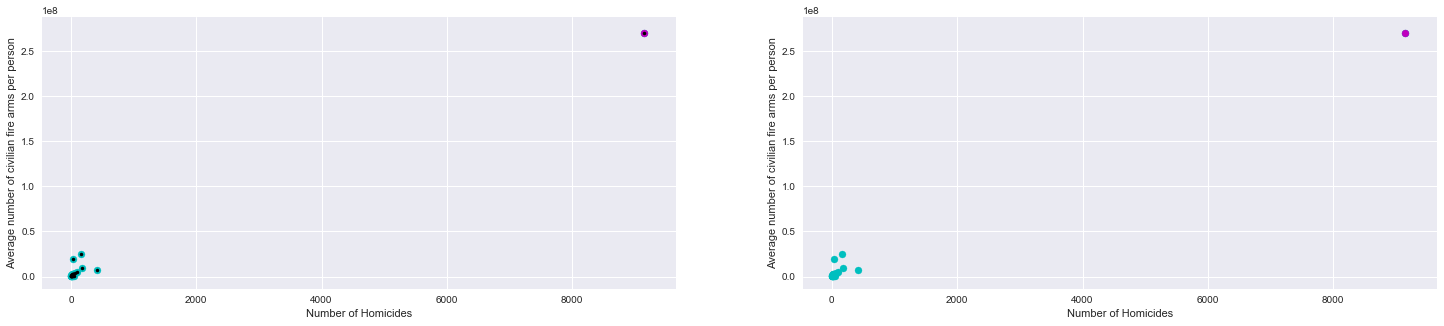

In [200]:
fig = pl.figure(figsize=(25,5)) 

#with error
ax = fig.add_subplot(121)
scatter = ax.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms'], color='c')
USscatter = ax.scatter(US['Number of homicides by firearm'], US['Average total all civilian firearms'], color='m')
ax.errorbar(df_['Number of homicides by firearm'], df_['Average total all civilian firearms'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0), fmt = '.', color='k')
ax.set_xlabel("Number of Homicides")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()

#without error
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms'], color='c')
USscatter2 = ax2.scatter(US['Number of homicides by firearm'], US['Average total all civilian firearms'], color='m')
ax2.set_xlabel("Number of Homicides")
ax2.set_ylabel("Average number of civilian fire arms per person")
ax2.set_ylim()

pl.show()

#### Figure 4. Homicides firearms vs number of civilian firearms

US has both highest average number of civilin firearms and number of homicides

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


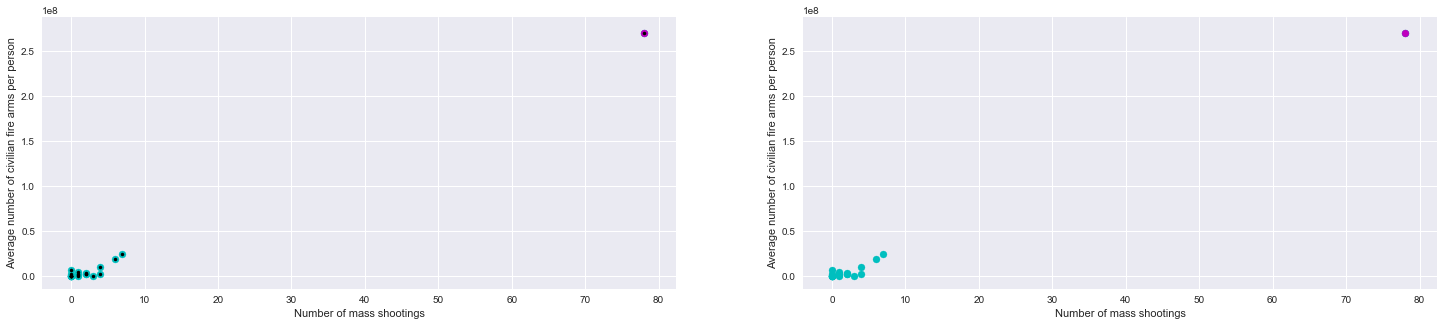

In [201]:
fig = pl.figure(figsize=(25,5)) 

#with error
ax = fig.add_subplot(121)
scatter = ax.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms'], color='c')
USscatter = ax.scatter(US['Number of mass shootings'], US['Average total all civilian firearms'], color='m')
ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0), fmt = '.', color='k')
ax.set_xlabel('Number of mass shootings')
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()

#without error
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms'], color='c')
USscatter2 = ax2.scatter(US['Number of mass shootings'], US['Average total all civilian firearms'], color='m')
ax2.set_xlabel('Number of mass shootings')
ax2.set_ylabel("Average number of civilian fire arms per person")
ax2.set_ylim()

pl.show()

#### Figure 5. Mass Shooting vs number of civilian firearms

US has both highest average number of civilin firearms and number of mass shooting

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




### 1. OLS

In [207]:
lm = smf.ols(formula='shootingspp ~ civfirecapita', data=df_).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        23:55:47   Log-Likelihood:                 163.40
No. Observations:                  22   AIC:                            -322.8
Df Residuals:                      20   BIC:                            -320.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.149e-05   5.15e-05      0.612      0.548   -7.59e-05       0.000
civfirecapita  3.911e-07   1.75e-07      2.230      0.037    2.52e-08    7.57e-07
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1. WLS

In [204]:
lm1 = smf.wls(formula='shootingspp ~ civfirecapita', data=df_, weights=abs(lm1.resid)).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.096
Model:                            WLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.121
Date:                Tue, 17 Oct 2017   Prob (F-statistic):              0.161
Time:                        23:54:45   Log-Likelihood:                 155.10
No. Observations:                  22   AIC:                            -306.2
Df Residuals:                      20   BIC:                            -304.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.016e-05   6.89e-05      0.583      0.567      -0.000       0.000
civfirecapita  4.009e-07   2.75e-07      1.457      0.161   -1.73e-07    9.75e-07
==============================================================================
Omnibus:                       46.597   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.496
Skew:                           3.573   Prob(JB):                     2.15e-43
Kurtosis:                      15.779   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

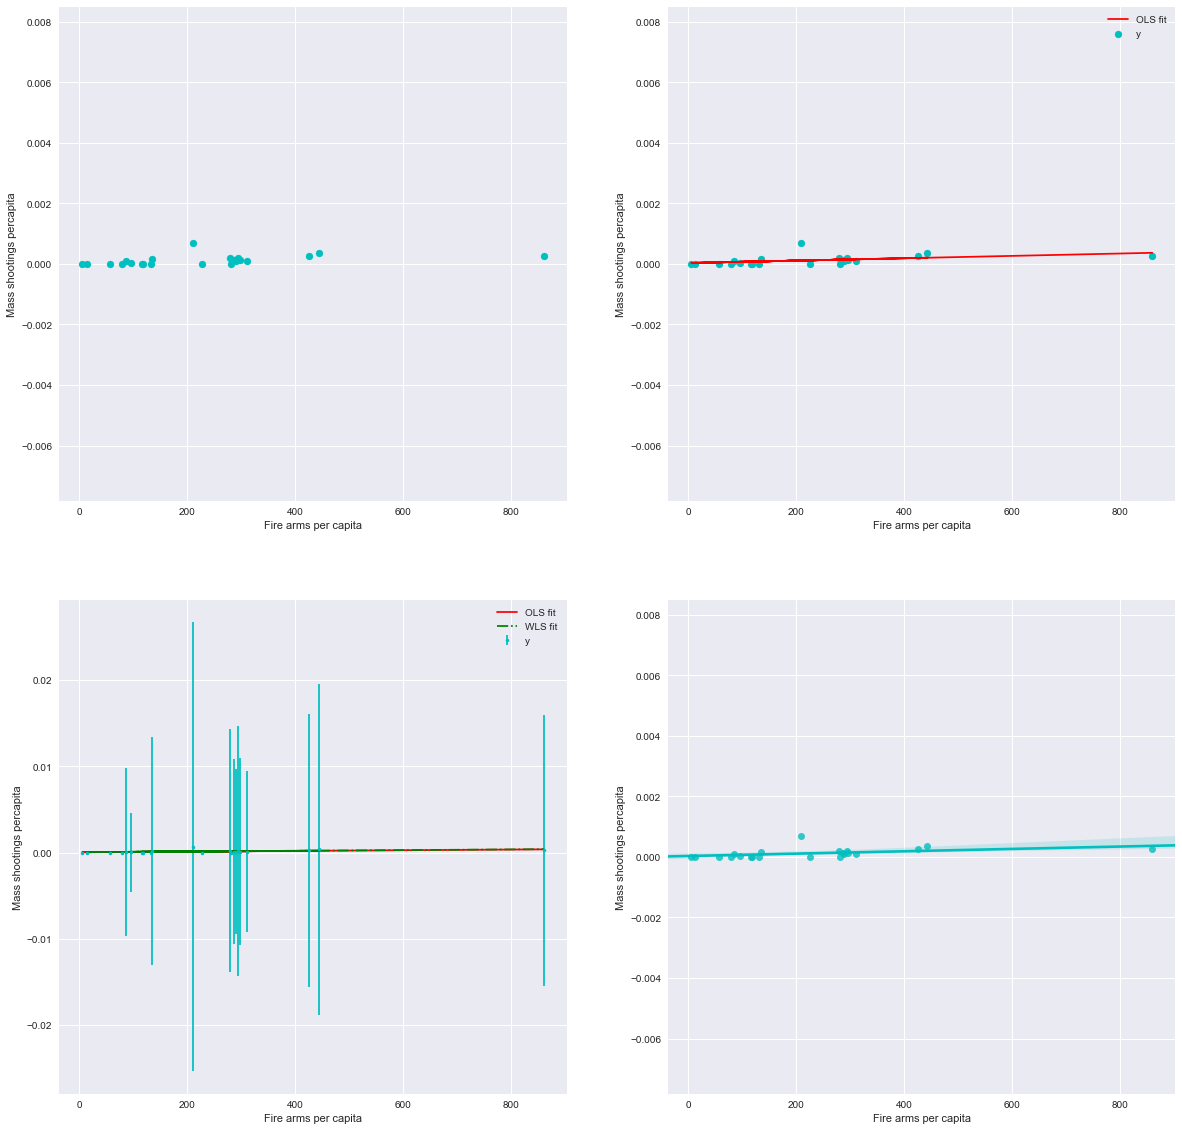

In [209]:
fig = pl.figure(figsize(20,20))

ax1 = fig.add_subplot(221)
ax1.scatter(df_['civfirecapita'], df_['shootingspp'], color='c')
ax1.set_xlabel('Fire arms per capita')
ax1.set_ylabel('Mass shootings percapita')

ax2 = fig.add_subplot(222)
ax2.scatter(df_['civfirecapita'], df_['shootingspp'], label='y', color='c')
ax2.plot(df_['civfirecapita'], lm.predict(), 'r-', label='OLS fit')
ax2.set_xlabel('Fire arms per capita')
ax2.set_ylabel('Mass shootings percapita')
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.errorbar(df_['civfirecapita'], df_['shootingspp'],
             yerr=np.sqrt(df_['shootingspp']), label='y', fmt='.', color='c')
ax3.plot(df_['civfirecapita'], lm.predict(), 'r-', label='OLS fit')
ax3.plot(df_['civfirecapita'], lm1.predict(), 'g-.', label='WLS fit')
ax3.set_xlabel('Fire arms per capita')
ax3.set_ylabel('Mass shootings percapita')
ax3.legend()

ax4 = fig.add_subplot(224)
sns.regplot(x=df_['civfirecapita'], y=df_['shootingspp'], data=df_, color='c')
ax4.set_xlabel('Fire arms per capita')
ax4.set_ylabel('Mass shootings percapita')